<a href="https://colab.research.google.com/github/fatimazain118/Deep-Learning-Assignments/blob/main/krishNaik/Tut17_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

keras(python DL library) is just like wrapper on the top of tenserflow and pytorce framework

In [21]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [22]:
from google.colab import drive  #mounting google drive to take excel sheet input
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
# Importing the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [24]:
#Create dummy variables as there were names in these column in dataset
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [25]:
# Concatenate it with the Data Frames as X is independent variable
#these 3 are added at back

X=pd.concat([X,geography,gender],axis=1)

In [26]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [27]:
## Drop Unnecessary columns as we have used dummy variable now
X=X.drop(['Geography','Gender'],axis=1)

In [28]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We'll do scaling because if we had very large input feature then computations for weights take time, and hence our model will converse very slow

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [32]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential   #used to import for this type of architecture of NN i.e ann, cnn
from keras.layers import Dense    #used for creating hidden layers
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout  #used to avoid overfitting condition in deep NN, it's a regularization parameter

In [34]:
# Initialising the ANN
classifier = Sequential()   #now it's a empty NN with no hidden layers in it

In [38]:
# Adding the input layer and the first hidden layer, output_dim means in hidden layer we'll have 6 neurons, and in input_dim we have 11 columns thats why input features are given as this
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))  #output_dim = units based on keras 2 API syntax has been updated init == kernel..

In [39]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [41]:
classifier.summary() #total params indicate that how many weights and bias are there

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


As in our model first weights are multiplied by input then bias is addded and then given to a activation function and this happens at every layer in one epoch, then in output loss function is derived and create a optimizer which reduces this loss fun ction 

In [45]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)  #we use batch_size to reduce our computational power, using validation_split so that we can separately test our model for test dataset

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5227 - accuracy: 0.7962 - val_loss: 0.4912 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4681 - accuracy: 0.7962 - val_loss: 0.4652 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4476 - accuracy: 0.7962 - val_loss: 0.4517 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.7964 - val_loss: 0.4446 - val_accuracy: 0.7970
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.8026 - val_loss: 0.4407 - val_accuracy: 0.7997
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4230 - accuracy: 0.8100 - val_loss: 0.4342 - val_accuracy: 0.8065
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4173 - accuracy: 0.8155 - val_loss: 0.4300 - val_accuracy: 0.8069

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


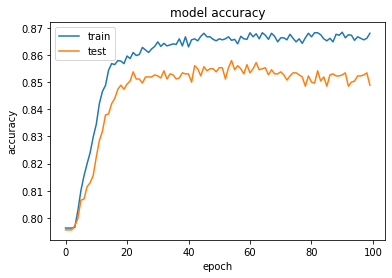

In [48]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

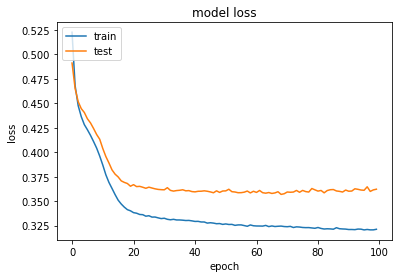

In [49]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# Part 3 - Making the predictions and evaluating the model for the test data

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1542,   53],
       [ 223,  182]])

In [53]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score       #traning acc/ validation acc/ and test accuracy all are almost same

0.862